Decision Tree classifier

A Decision Tree classifier for fake news detection is a machine learning model that makes decisions based on a tree-like structure of conditions. The tree is constructed by recursively splitting the data into subsets based on features, and at each node, a decision is made. In the context of fake news detection, features related to language patterns, source credibility, or content characteristics could be used, and the model learns to classify news articles as genuine or fake based on these features.

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('FakeNewsNet.csv')


In [39]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [40]:
train_data, test_data, train_labels, test_labels = train_test_split(
    df['title'], df['real'], test_size=0.2, random_state=42
)

In [41]:
vectorizer = CountVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_data)
X_test = vectorizer.transform(test_data)

The code initializes a Decision Tree classifier with a fixed random state and then fits the classifier to training data (X_train) and corresponding labels (train_labels). The decision tree model is trained using the provided training dataset.

In [42]:
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train, train_labels)

C:\Users\thoma\.conda\envs\pythonProject1\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\thoma\.conda\envs\pythonProject1\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


DecisionTreeClassifier(random_state=42)

In [43]:
test_predictions = tree_classifier.predict(X_test)


In [44]:
accuracy = accuracy_score(test_labels, test_predictions)
conf_matrix = confusion_matrix(test_labels, test_predictions)

print(f'Test Accuracy: {accuracy:.3f}')
print('Confusion Matrix:')
print(conf_matrix)

Test Accuracy: 0.770
Confusion Matrix:
[[ 588  517]
 [ 533 2936]]


C:\Users\thoma\.conda\envs\pythonProject1\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\thoma\.conda\envs\pythonProject1\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\thoma\.conda\envs\pythonProject1\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\thoma\.conda\envs\pythonProject1\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

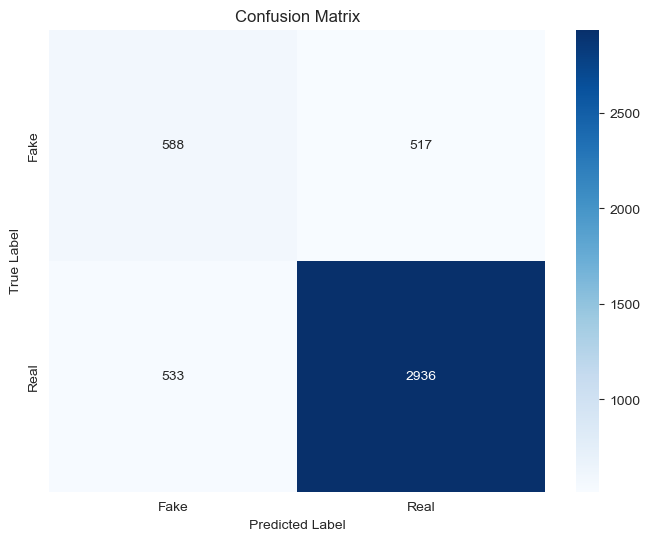

In [45]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()